# **Part I. Data Exploration**

# Analysis of Factors Contributing to High Fatalities in Political Violence Events in Nigeria

This analysis explores the factors associated with high fatalities in political violence events in Nigeria, using the ACLED dataset. We examine variables such as geographic locations, event types, and actors involved to understand their impact on fatalities. We employ data exploration, statistical testing, NLP, and geo-spatial techniques to identify patterns that contribute to fatalities. The insights derived from this analysis can guide  interventions in targeted regions and event types with high fatality risks.


## 1. Data Understanding and Initial Exploration

In [22]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import kde

# load the dataset
pd.set_option('display.max_columns', None)
acled_df = pd.read_csv('Nigeria_ACLED.csv')


# Display dataset structure and sample rows
print(acled_df.info())
acled_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ACLED Actor1             1902 non-null   object 
 1   ACLED Actor1 (group)     1902 non-null   object 
 2   ACLED Actor2             1601 non-null   object 
 3   ACLED Admin1             1902 non-null   object 
 4   ACLED Admin2             1902 non-null   object 
 5   ACLED Admin3             0 non-null      float64
 6   ACLED Ally Actor1        430 non-null    object 
 7   ACLED Ally Actor2        640 non-null    object 
 8   ACLED CreatedOn          1902 non-null   object 
 9   ACLED Event ID Cnty      1902 non-null   object 
 10  ACLED Event ID No Cnty   1902 non-null   int64  
 11  ACLED Event SubType      1902 non-null   object 
 12  ACLED Event SubTypeDesc  1902 non-null   object 
 13  ACLED Event Type         1902 non-null   object 
 14  ACLED Event TypeDesc    

,ACLED Actor1,ACLED Actor1 (group),ACLED Actor2,ACLED Admin1,ACLED Admin2,ACLED Admin3,ACLED Ally Actor1,ACLED Ally Actor2,ACLED CreatedOn,ACLED Event ID Cnty,ACLED Event ID No Cnty,ACLED Event SubType,ACLED Event SubTypeDesc,ACLED Event Type,ACLED Event TypeDesc,ACLED Location,ACLED Notes,ACLED Region,ACLED Source,ACLED SourceScale,ACLED Year,Geographic Area,ACLED Fatalities,ACLED Geo Precision,ACLED Inter1,ACLED Inter2,ACLED Interaction,ACLED Latitude,ACLED Longitude
0,Police Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Abia,Umuahia North,NaN,NaN,NaN,12/12/2022 3:33,NIG28349,28349,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Umuahia,"On 15 October 2022, a policeman shot and kille...",Western Africa,Premium Times (Nigeria),National,2022,South,1,1,1,1,11,5.5263,7.4896
1,Military Forces of Nigeria (2015-),State Security Forces,Military Forces of Nigeria (2015-),Imo,Oguta,NaN,NaN,NaN,12/6/2022 15:53,NIG28909,28909,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Izombe,"On 28 November 2022, suspected security operat...",Western Africa,Daily Trust (Nigeria),National,2022,South,0,1,1,1,11,5.6333,6.8666
2,Military Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Lagos,Amowo-Odofin,NaN,NaN,NaN,12/13/2022 9:05,NIG29012,29012,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Satellite Town,"On 3 December 2022, some naval officers clashe...",Western Africa,Daily Trust (Nigeria); Nigeria Punch,National,2022,South,1,1,1,1,11,6.4437,3.2522
3,Military Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Ogun,Shagamu,NaN,NaN,NaN,2/21/2023 9:05,NIG29996,29996,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Ogigo,"On 15 February 2023, soldiers from 174 battali...",Western Africa,Daily Trust (Nigeria); Nigeria Punch,National,2023,South,0,1,1,1,11,6.6955,3.5117
4,Police Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Kebbi,Birnin-Kebbi,NaN,NaN,NaN,12/12/2022 3:33,NIG28350,28350,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Birnin Kebbi,"On 1 October 2022, a policeman stabbed and kil...",Western Africa,Sahara Reporters; Daily Trust (Nigeria),National-Regional,2022,North West,1,1,1,1,11,12.4539,4.1975


### Data Overview

The dataset contains 1,902 rows and 29 columns with information on various political violence events in Nigeria. Key columns include:

- **ACLED Actor1**: Primary group involved in the event
- **ACLED Admin1**: Major administrative region where the event took place
- **ACLED Event Type**: Type of event (e.g., battles, protests)
- **ACLED Notes**: Descriptive notes about the event
- **ACLED Fatalities**: Fatality count for each event (our main focus)
- **Geographic Coordinates**: `ACLED Latitude` and `ACLED Longitude` provide the location of events.


## Basic Data Exploration Plots

Top 5 Primary Actors, Actor Groups, Administrative Regions, and Event Types

In [23]:
# Selecting relevant categorical columns for analysis
categorical_columns = ['ACLED Actor1', 'ACLED Actor1 (group)', 'ACLED Admin1', 'ACLED Event Type', 'Geographic Area']

#calculate unique values in each categorical column
categorical_counts = {col: acled_df[col].value_counts() for col in categorical_columns}

# Displaying top 5 categories for each column to summarize key insights
top_categorical_counts = {col: counts.head(5) for col, counts in categorical_counts.items()}

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categoric

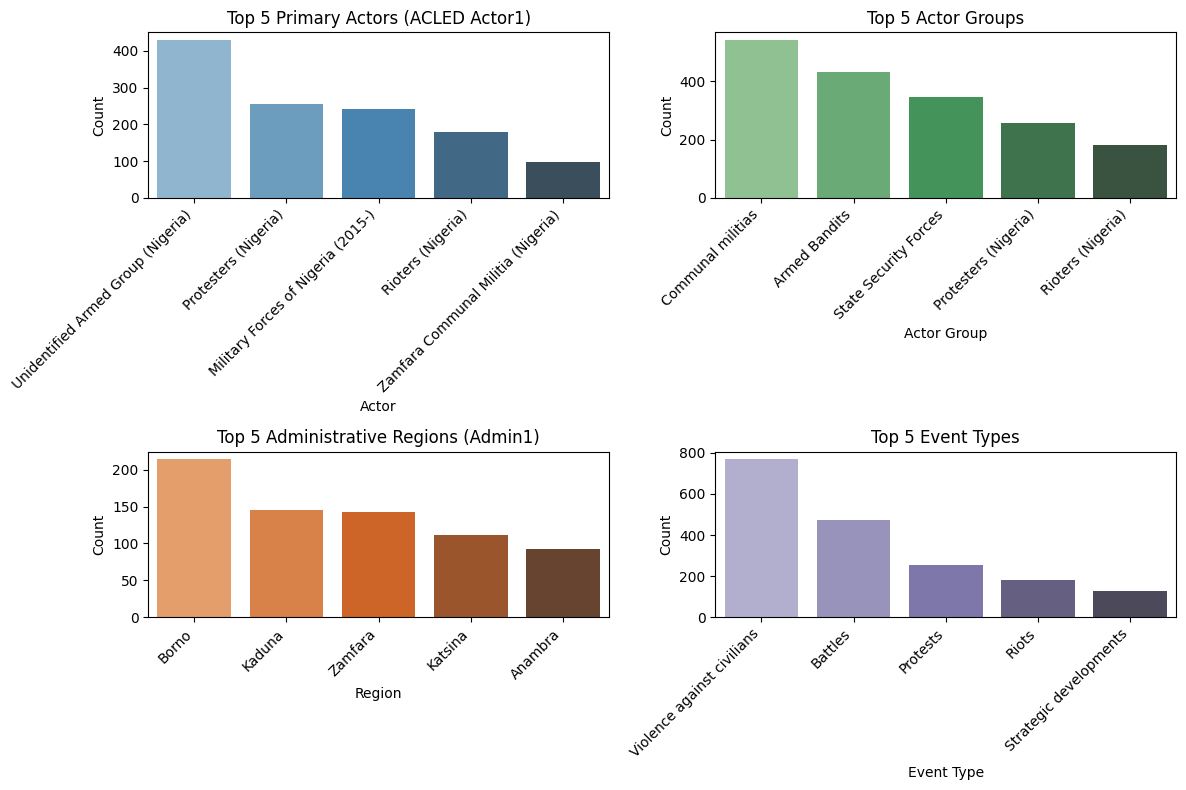

In [24]:
# Set up a consistent figure size for all categorical plots
plt.figure(figsize=(12, 8))

# Top Actors involved (ACLED Actor1)
plt.subplot(2, 2, 1)
sns.barplot(x=top_categorical_counts['ACLED Actor1'].index, y=top_categorical_counts['ACLED Actor1'].values, palette="Blues_d")
plt.title('Top 5 Primary Actors (ACLED Actor1)')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")

# Top Actor Groups (ACLED Actor1 (group))
plt.subplot(2, 2, 2)
sns.barplot(x=top_categorical_counts['ACLED Actor1 (group)'].index, y=top_categorical_counts['ACLED Actor1 (group)'].values, palette="Greens_d")
plt.title('Top 5 Actor Groups')
plt.xlabel('Actor Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")

# Top Administrative Regions (ACLED Admin1)
plt.subplot(2, 2, 3)
sns.barplot(x=top_categorical_counts['ACLED Admin1'].index, y=top_categorical_counts['ACLED Admin1'].values, palette="Oranges_d")
plt.title('Top 5 Administrative Regions (Admin1)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")

# Top Event Types
plt.subplot(2, 2, 4)
sns.barplot(x=top_categorical_counts['ACLED Event Type'].index, y=top_categorical_counts['ACLED Event Type'].values, palette="Purples_d")
plt.title('Top 5 Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()



### Findings from Initial Exploration

These plots provide an overview of the dataset:

- **Top Actors**: The most frequently involved groups are the "Unidentified Armed Group," "Protesters," and "Military Forces," indicating a mix of organized groups and general civil unrest.
- **Top Actor Groups**: Communal militias and armed bandits appear prominently, highlighting recurring actors in violent events.
- **Top Regions**: States like Borno, Kaduna, and Zamfara experience the most events, reflecting known hotspots of conflict.
- **Top Event Types**: The most common event types include "Violence against civilians" and "Battles," which likely contribute to higher fatality counts in the dataset.

These preliminary insights help contextualize the factors influencing fatality rates, setting the stage for more detailed analysis.


# 2. Data Cleaning


In [25]:
# Check missing values
acled_df.isnull().sum()

ACLED Actor1                  0
ACLED Actor1 (group)          0
ACLED Actor2                301
ACLED Admin1                  0
ACLED Admin2                  0
ACLED Admin3               1902
ACLED Ally Actor1          1472
ACLED Ally Actor2          1262
ACLED CreatedOn               0
ACLED Event ID Cnty           0
ACLED Event ID No Cnty        0
ACLED Event SubType           0
ACLED Event SubTypeDesc       0
ACLED Event Type              0
ACLED Event TypeDesc          0
ACLED Location                0
ACLED Notes                   0
ACLED Region                  0
ACLED Source                  0
ACLED SourceScale             0
ACLED Year                    0
Geographic Area               0
ACLED Fatalities              0
ACLED Geo Precision           0
ACLED Inter1                  0
ACLED Inter2                  0
ACLED Interaction             0
ACLED Latitude                0
ACLED Longitude               0
dtype: int64

In [26]:
# Convert 'ACLED Fatalities' to numeric data type and handle any parsing errors
acled_df['ACLED Fatalities'] = pd.to_numeric(acled_df['ACLED Fatalities'], errors='coerce')

# Drop columns with a high proportion of missing values (e.g., ACLED Admin3) and non-analytical identifiers
acled_df = acled_df.drop(columns=['ACLED Admin3', 'ACLED Ally Actor1', 'ACLED Ally Actor2', 'ACLED Event ID Cnty', 'ACLED Event ID No Cnty'])

# Check for any remaining missing values
acled_df.isnull().sum()


ACLED Actor1                 0
ACLED Actor1 (group)         0
ACLED Actor2               301
ACLED Admin1                 0
ACLED Admin2                 0
ACLED CreatedOn              0
ACLED Event SubType          0
ACLED Event SubTypeDesc      0
ACLED Event Type             0
ACLED Event TypeDesc         0
ACLED Location               0
ACLED Notes                  0
ACLED Region                 0
ACLED Source                 0
ACLED SourceScale            0
ACLED Year                   0
Geographic Area              0
ACLED Fatalities             0
ACLED Geo Precision          0
ACLED Inter1                 0
ACLED Inter2                 0
ACLED Interaction            0
ACLED Latitude               0
ACLED Longitude              0
dtype: int64

### Data Cleaning Steps

- Converted `ACLED Fatalities` to a numeric type for accurate calculations.
- Dropped columns with high proportions of missing values or those unlikely to add analytical value (e.g., `ACLED Admin3`, unique identifiers).
  
This leaves us with the core dataset needed for analysis.


# 3. Exploratory Data Analysis

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


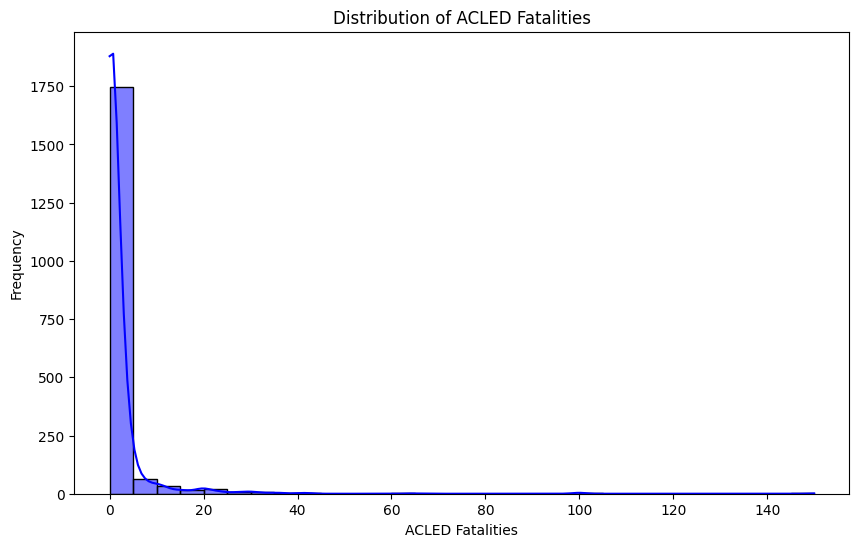

In [27]:
# Plot the distribution of ACLED Fatalities
plt.figure(figsize=(10, 6))
sns.histplot(acled_df['ACLED Fatalities'], bins=30, kde=True, color='blue')
plt.title('Distribution of ACLED Fatalities')
plt.xlabel('ACLED Fatalities')
plt.ylabel('Frequency')
plt.show()


### Findings from Fatalities Distribution

The distribution of `ACLED Fatalities` is highly skewed, with most events resulting in few or no fatalities. However, a small number of events show extremely high fatalities, indicating occasional high-intensity violence.


# Analysis of Geographic Area, Event Type, and Primary Actor

### 3.1 Geographic Area Analysis
I analyze the impact of location on fatality rates by examining average fatalities by state and geographic region, identifying areas with high fatality concentrations. Additionally, an Integrated Geographic Distribution and Fatality Intensity Map highlights high-fatality hotspots using kernel density estimation, with darker areas indicating regions of concentrated fatalities, particularly in the North-East and Middle-Belt.

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


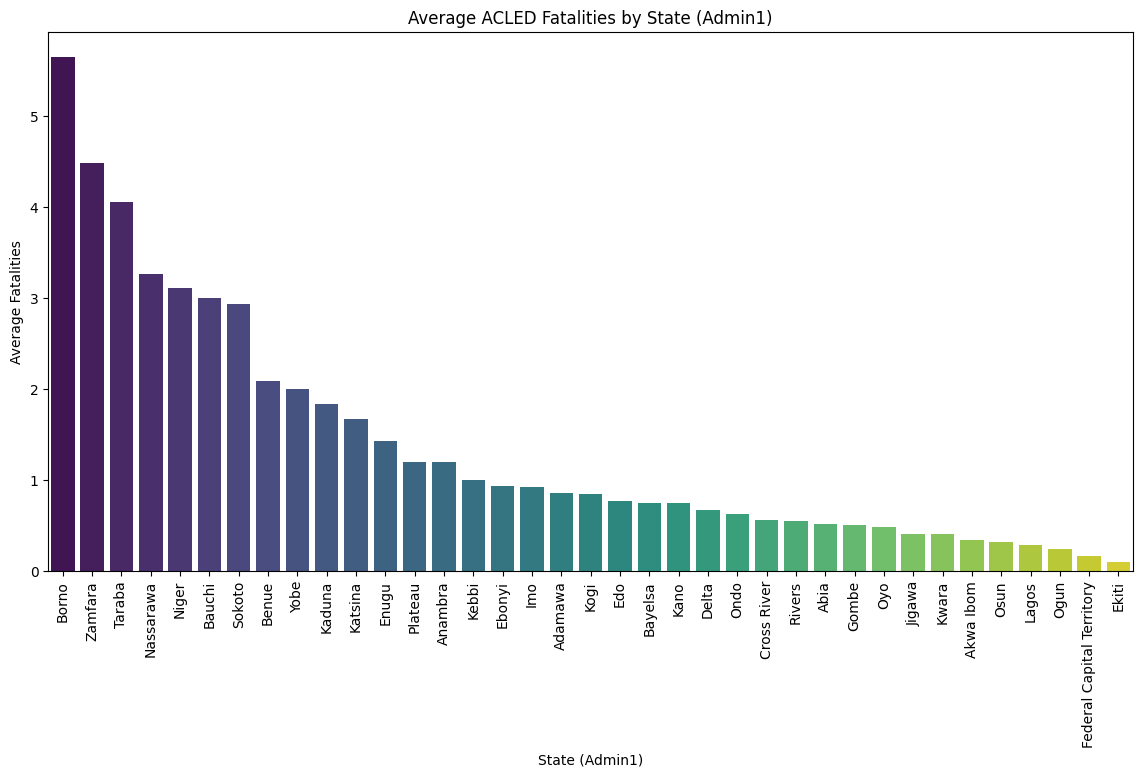

In [28]:
# Calculate mean fatalities by state (ACLED Admin1)
geo_fatalities_state = acled_df.groupby('ACLED Admin1')['ACLED Fatalities'].mean().sort_values(ascending=False)

# Plotting average fatalities by state
plt.figure(figsize=(14, 7))
sns.barplot(x=geo_fatalities_state.index, y=geo_fatalities_state.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Average ACLED Fatalities by State (Admin1)')
plt.xlabel('State (Admin1)')
plt.ylabel('Average Fatalities')
plt.show()


### Findings for Detailed View (State Level)

Certain states, particularly Borno, Zamfara, and Taraba, exhibit significantly higher average fatalities. This suggests these states may be specific hotspots of high-intensity conflict, warranting targeted interventions.


/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


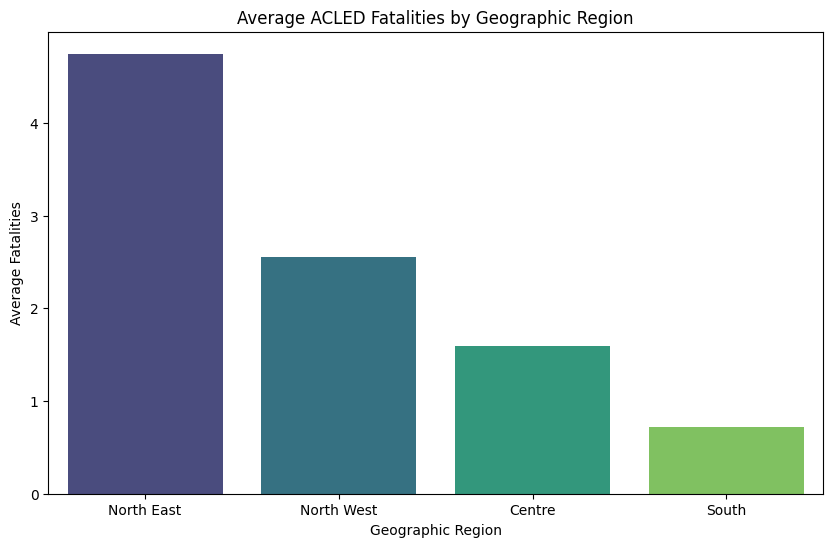

In [29]:
# Calculate mean fatalities by geographic region (Geographic Area)
geo_fatalities_region = acled_df.groupby('Geographic Area')['ACLED Fatalities'].mean().sort_values(ascending=False)

# Plotting average fatalities by region
plt.figure(figsize=(10, 6))
sns.barplot(x=geo_fatalities_region.index, y=geo_fatalities_region.values, palette="viridis")
plt.title('Average ACLED Fatalities by Geographic Region')
plt.xlabel('Geographic Region')
plt.ylabel('Average Fatalities')
plt.show()


### Findings for Broader View (Geographic Region)

The broader view reveals that the North-East region has the highest average fatalities, followed by the North-West. This broader regional trend highlights areas with prevalent conflict across multiple states, providing insights into larger regional patterns of violence.


**Integrated Geographic Distribution and Fatality Intensity Map**


/var/folders/5_/pk9gjs1d39g2gvf744_6_dnc0000gp/T/ipykernel_39562/2820988659.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([acled_df['ACLED Longitude'], acled_df['ACLED Latitude']])


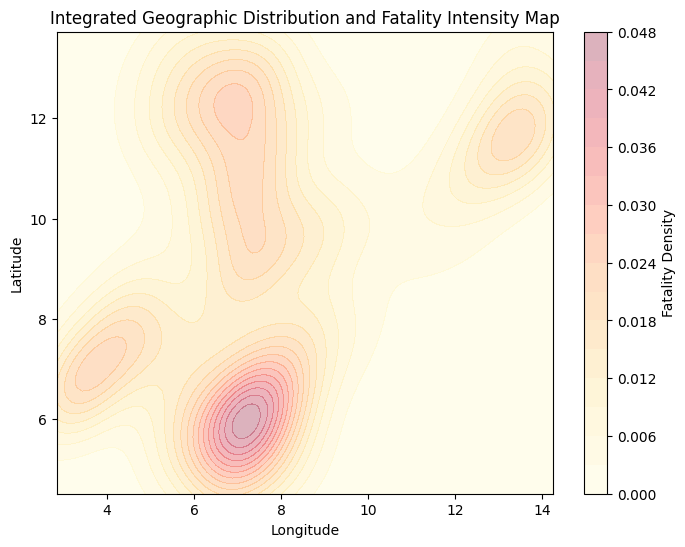

In [84]:
from scipy.stats import kde

# Kernel Density Estimation (KDE) for Fatality Density Overlay
k = kde.gaussian_kde([acled_df['ACLED Longitude'], acled_df['ACLED Latitude']])

# Generate a grid over the longitude and latitude range for contour plotting
xi, yi = np.meshgrid(
    np.linspace(acled_df['ACLED Longitude'].min(), acled_df['ACLED Longitude'].max(), 100),
    np.linspace(acled_df['ACLED Latitude'].min(), acled_df['ACLED Latitude'].max(), 100)
)
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# Plot the integrated map with KDE contours and a fatality intensity color scale
plt.figure(figsize=(8, 6))
plt.contourf(xi, yi, zi.reshape(xi.shape), levels=15, cmap="YlOrRd", alpha=0.3)  # KDE density contours
plt.colorbar(label="Fatality Density")  # Color bar representing fatality density
plt.title("Integrated Geographic Distribution and Fatality Intensity Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

This map uses kernel density estimation (KDE) to display high-fatality hotspots in Nigeria. Darker areas represent regions with higher fatality density, highlighting critical zones that may need targeted intervention.


### 3.2 Event Type Analysis
This section examines the impact of event types on fatality rates. We start with a detailed view, showing the average fatalities for each specific event type, and follow with a broader view that categorizes events by fatality level (High Fatality vs. Low Fatality). This approach provides both specific and general insights into which event types are most fatal.


Detailed View: Average Fatalities by Event Type

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


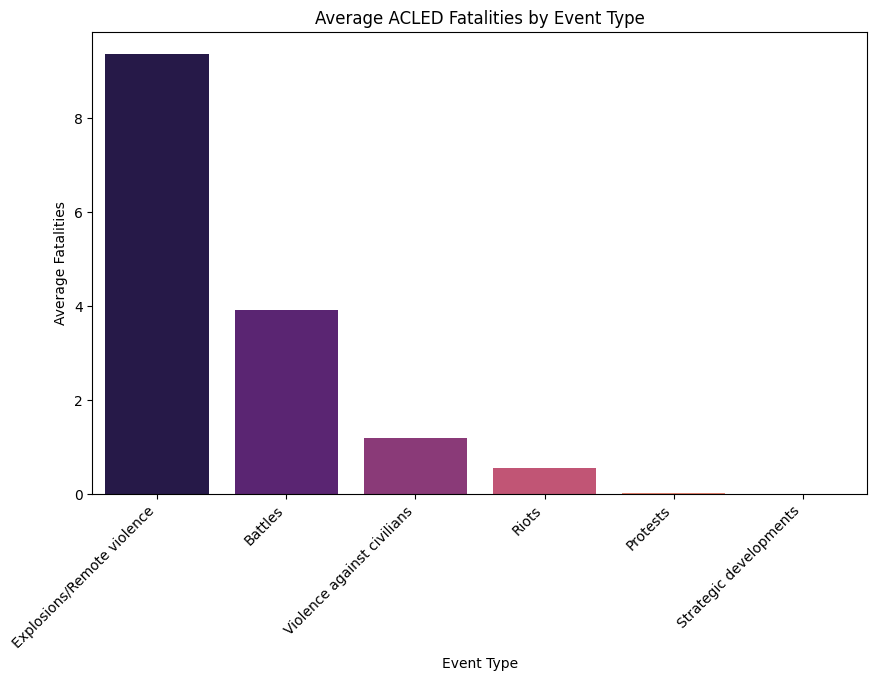

In [30]:
# Calculate average fatalities by event type
event_fatalities = acled_df.groupby('ACLED Event Type')['ACLED Fatalities'].mean().sort_values(ascending=False)

# Plotting average fatalities by event type
plt.figure(figsize=(10, 6))
sns.barplot(x=event_fatalities.index, y=event_fatalities.values, palette="magma")
plt.xticks(rotation=45, ha='right')
plt.title('Average ACLED Fatalities by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Fatalities')
plt.show()


### Findings for Detailed View (Event Type)

Event types like "Explosions/Remote violence" and "Battles" have significantly higher average fatalities than other event types. This highlights that events involving explosions and direct armed conflict tend to be far more fatal, while events like "Protests" and "Strategic developments" are generally associated with fewer fatalities.


Broader View: Distribution of Fatality Levels by Event Type

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


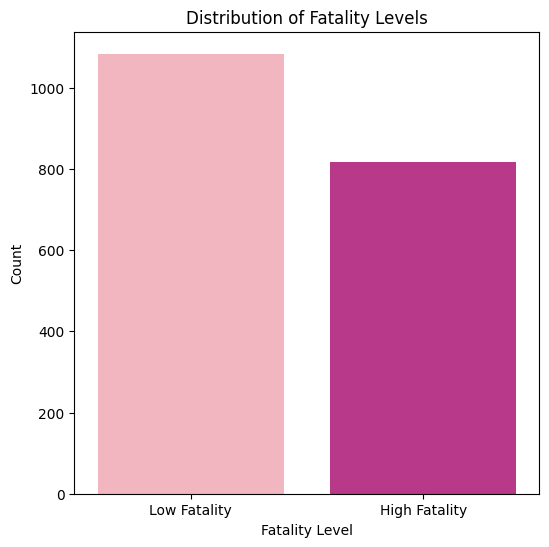

In [31]:
# Define high and low fatality levels based on median fatalities for simplification
median_fatalities = acled_df['ACLED Fatalities'].median()
acled_df['Fatality Level'] = acled_df['ACLED Fatalities'].apply(lambda x: 'High Fatality' if x > median_fatalities else 'Low Fatality')

# Count distribution of fatality levels
fatality_level_counts = acled_df['Fatality Level'].value_counts()

# Plotting fatality levels
plt.figure(figsize=(6, 6))
sns.barplot(x=fatality_level_counts.index, y=fatality_level_counts.values, palette="RdPu")
plt.title('Distribution of Fatality Levels')
plt.xlabel('Fatality Level')
plt.ylabel('Count')
plt.show()


### Findings for Broader View (Fatality Levels)

The broader classification shows that a majority of events fall into the "High Fatality" category, indicating that many events in Nigeria’s political violence context are severe in terms of fatality impact. This broader view supports the detailed analysis by emphasizing the fatal nature of many events in this dataset.


### ANOVA Test

In [87]:
from scipy.stats import f_oneway

# 1. ANOVA Test for Event Type ---
# Group fatalities by event type
event_type_groups = [group['ACLED Fatalities'].values for name, group in acled_df.groupby('ACLED Event Type')]

# Perform ANOVA to test if fatalities vary significantly by event type
f_stat, p_value_event_type = f_oneway(*event_type_groups)

# Results
f_stat, p_value_event_type

(42.971302192427274, 4.612039785892055e-42)

Statistical Validation of Event Type Analysis (ANOVA Test)

An ANOVA test confirms that the differences in fatalities across event types are statistically significant (p < 0.001). This validation strengthens the findings, indicating that specific event types are consistently associated with higher fatality rates. Such insights can guide resource allocation to reduce fatalities in high-risk event types.

### 3.3 Actor Type Analysis

I analyze how the primary actors involved in events influence fatality rates. We begin with a detailed view, showing the top actors with the highest average fatalities, and then shift to a broader view categorizing actors as either "Armed Group" or "Unarmed Group" to observe general trends.


Detailed View: Top 10 Actors by Average Fatalities

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


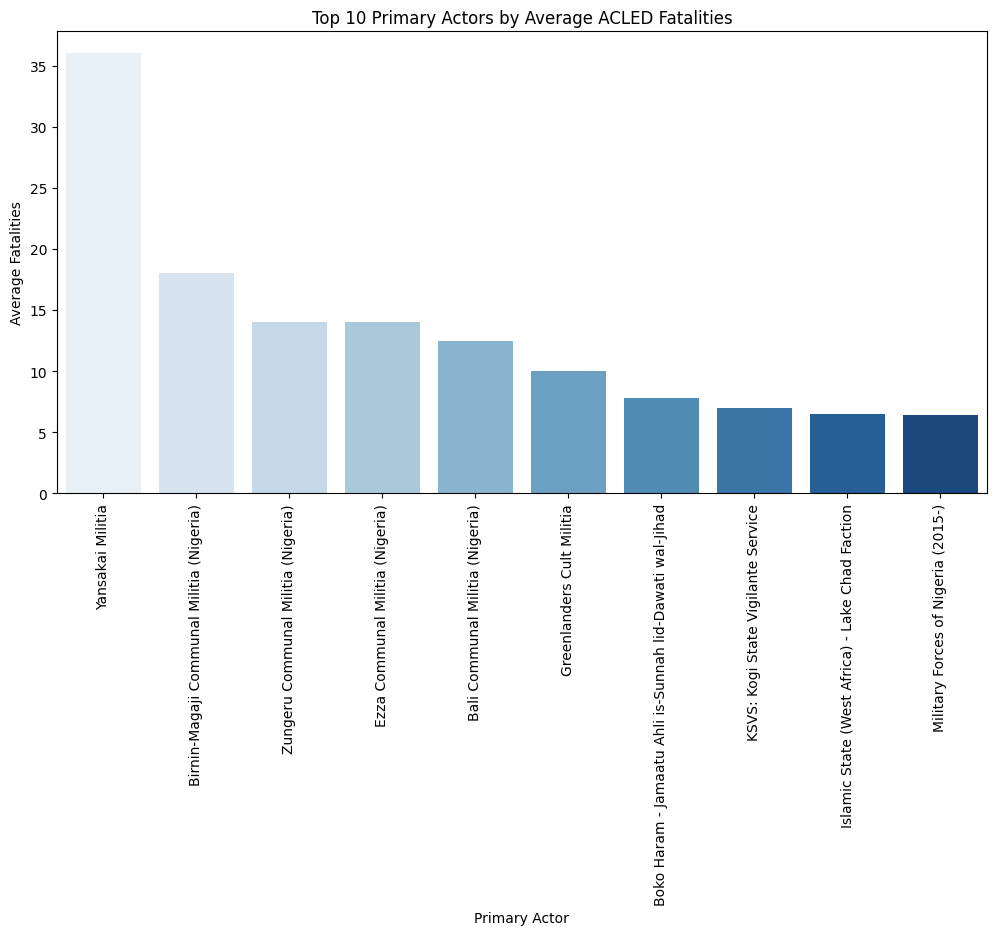

In [32]:
# Identify top 10 actors by average fatalities
top_actors = acled_df.groupby('ACLED Actor1')['ACLED Fatalities'].mean().sort_values(ascending=False).head(10)

# Plotting top 10 actors by average fatalities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.index, y=top_actors.values, palette="Blues")
plt.xticks(rotation=90)
plt.title('Top 10 Primary Actors by Average ACLED Fatalities')
plt.xlabel('Primary Actor')
plt.ylabel('Average Fatalities')
plt.show()


### Findings for Detailed View (Top Actors)

The detailed view shows that specific actors, especially various militias, have the highest average fatalities. Groups like "Yansakai Militia" and "Birnin-Magaji Communal Militia" are particularly associated with high fatality events, indicating their role in severe violence within the dataset.


Broader View: Average Fatalities by Actor Category

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


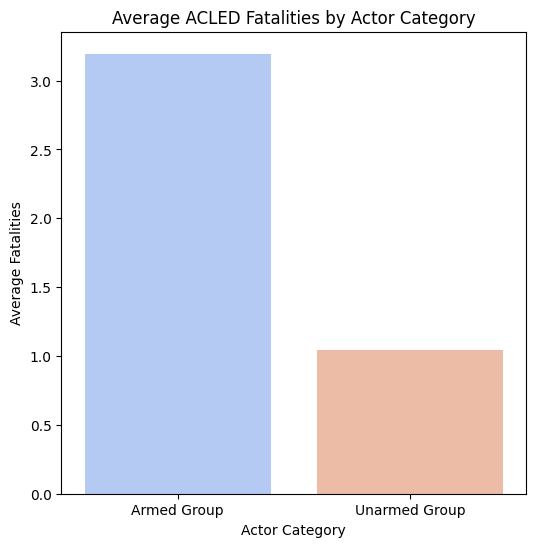

In [33]:
# Categorize actors as armed or unarmed groups
acled_df['Actor Category'] = acled_df['ACLED Actor1'].apply(lambda x: 'Armed Group' if 'militia' in x.lower() or 'military' in x.lower() or 'police' in x.lower() else 'Unarmed Group')

# Calculate average fatalities by actor category
actor_category_fatalities = acled_df.groupby('Actor Category')['ACLED Fatalities'].mean()

# Plotting average fatalities by actor category
plt.figure(figsize=(6, 6))
sns.barplot(x=actor_category_fatalities.index, y=actor_category_fatalities.values, palette="coolwarm")
plt.title('Average ACLED Fatalities by Actor Category')
plt.xlabel('Actor Category')
plt.ylabel('Average Fatalities')
plt.show()


### Findings for Broader View (Actor Category)

The broader view shows that events involving armed actors have significantly higher fatalities than those involving unarmed actors. This finding underscores the impact of militarized or organized armed groups on the severity of violence in political events.


NLP Analysis on Actor Type

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Filter high-fatality events
high_fatality_events = acled_df[acled_df['ACLED Fatalities'] > acled_df['ACLED Fatalities'].median()]

# Extract top terms using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=15, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(high_fatality_events['ACLED Notes'])

top_words = tfidf_vectorizer.get_feature_names_out()
top_scores = tfidf_matrix.sum(axis=0).A1
important_terms = sorted(zip(top_words, top_scores), key=lambda x: x[1], reverse=True)
important_terms


[('killed', 198.18728718762958),
 ('2022', 167.68277855223937),
 ('militia', 166.1442239596455),
 ('coded', 144.40381305065327),
 ('armed', 121.34106587142404),
 ('2023', 117.99759345768696),
 ('attacked', 110.62661294699227),
 ('group', 101.39050855926925),
 ('unidentified', 96.33779222465309),
 ('december', 90.1676770585798),
 ('militants', 85.13624773416603),
 ('assailants', 84.0411364124477),
 ('january', 83.48021713920178),
 ('clashed', 80.56722620286381),
 ('lga', 80.27780689715809)]

NLP analysis of ACLED Notes reveals terms like "killed," "militia," and "armed," indicating organized violence by armed groups. Date-related terms ("2022," "2023") suggest an increase in high-fatality events, possibly linked to rising activities of these groups.

# Task: What factors are most associated with high ACLED Fatalities? Choose 3 factors and visualize them clearly. Explain your findings in a short paragraph. 

ANSWER: To identify the factors most associated with high fatalities in Nigeria’s political violence events, I focused on Geographic Area, Event Type, and Actor Type. These factors were selected based on initial observations of fatality patterns across different regions, types of events, and groups involved. The analysis revealed that Geographic Area plays a significant role, with the North-East region—especially states like Borno and Zamfara—experiencing the highest fatalities. Event Type also proved crucial, as incidents involving battles and explosions result in significantly higher fatality averages compared to other event types. Finally, Actor Type showed that events involving armed actors, such as militias and military forces, are linked to much higher fatalities. These findings highlight specific areas, event types, and actor characteristics that contribute to elevated fatality counts in Nigeria’s political violence landscape.

# 4. Conclusion

My findings underscore critical areas and factors contributing to high fatalities in Nigeria’s political violence events:

1. **Hotspot Identification**: The North-East region, particularly **Borno** and **Zamfara** states, emerges as a high-risk area with dense clusters of high-fatality events. Targeted intervention in these areas could help reduce violence and mitigate fatalities.

2. **Event and Actor Impacts**: The analysis indicates that **explosive and confrontational events** are more likely to lead to fatalities, especially when **armed groups** are involved. This insight can guide policymakers and security agencies to focus on mitigating the impacts of specific types of events and actors.

3. **Statistical Validation**: The statistical tests (ANOVA and t-test) validate the importance of event type in influencing fatality rates. This quantitative backing strengthens the reliability of our findings and highlights key risk factors in Nigeria’s political violence landscape.

In summary, this analysis provides a data-driven foundation for targeted policy measures and strategic interventions aimed at reducing fatalities in conflict-prone areas of Nigeria.


# **Part II. Machine Learning**

# Violence Dataset Analysis

This analysis uses the `Class` variable from the violence dataset as the target, where `Class` indicates escalation of violence. The objective is to build predictive models for escalation and improve performance using various techniques.

**Task Objectives:**
1. Select an appropriate evaluation metric and justify the choice.
2. Fit and compare a logistic regression model and a random forest model, explaining which performs better.
3. Apply techniques to improve model performance and explain the approach.


# 1. Data Understanding

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
violence = pd.read_csv('violence.csv')

# Display initial dataset structure and statistics
print(violence.info())
violence.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   F1      284807 non-null  float64
 1   F2      284807 non-null  float64
 2   F3      284807 non-null  float64
 3   F4      284807 non-null  float64
 4   F5      284807 non-null  float64
 5   F6      284807 non-null  float64
 6   F7      284807 non-null  float64
 7   F8      284807 non-null  float64
 8   F9      284807 non-null  float64
 9   F10     284807 non-null  float64
 10  F11     284807 non-null  float64
 11  F12     284807 non-null  float64
 12  F13     284807 non-null  float64
 13  F14     284807 non-null  float64
 14  F15     284807 non-null  float64
 15  F16     284807 non-null  float64
 16  F17     284807 non-null  float64
 17  F18     284807 non-null  float64
 18  F19     284807 non-null  float64
 19  F20     284807 non-null  float64
 20  F21     284807 non-null  float64
 21  F22     28

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,1.874948e-12,1.053347e-12,7.127611e-13,-1.474791e-13,-5.231558e-13,-2.282250e-13,-6.425436e-13,4.950748e-13,7.057397e-13,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


### Dataset Overview
The dataset consists of 284,807 entries across 29 columns, representing various features related to violence events. The target variable, `Class`, indicates the classification of each event, with other columns providing numerical feature values.


# 2. Class Imbalance Check and Basic EDA

Class Distribution:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


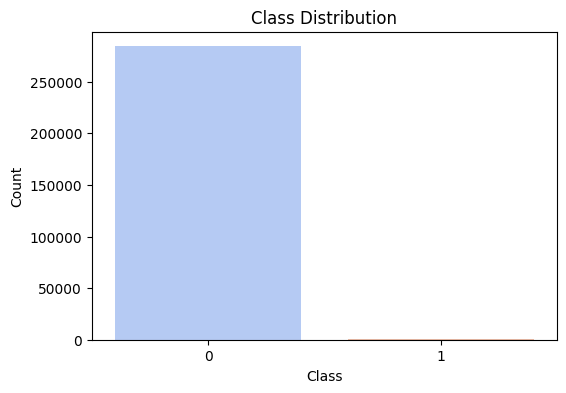

In [52]:
# Check class distribution
class_counts = violence['Class'].value_counts(normalize=True)
print("Class Distribution:\n", class_counts)

# Plotting class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=violence, x='Class', palette="coolwarm")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


### Class Distribution
The dataset is heavily imbalanced, with over 99% of instances labeled as 0. This class imbalance will necessitate techniques like resampling and class-weight adjustments in model training.


# 3. Data Preprocessing and Scaling


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Split data into features (X) and target (y)
X = violence.drop(columns=['Class'])
y = violence['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features using RobustScaler to handle potential outliers
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Data Preprocessing
To ensure consistent feature scales, RobustScaler is applied. This is particularly useful for dealing with outliers, a common characteristic in violence-related datasets.


# Task 1: Choosing an Evaluation Metric

For this dataset, I have chosen **Precision**, **Recall**, **F1 Score**, and the **AUC-ROC Curve** as the primary evaluation metrics, this is because:

- **Precision**: Precision will help us understand how many of the events predicted as violent (positive class) are truly violent. This is important to avoid false positives, which could be resource-intensive or disruptive.

- **Recall**: Recall indicates how many actual violent events the model successfully identified. High recall is crucial for minimizing false negatives, ensuring that we capture as many true instances of violence as possible.

- **F1 Score**: This metric balances precision and recall, making it well-suited for imbalanced datasets. The F1 score emphasizes the importance of correctly classifying the minority class without allowing the majority class to dominate performance.

- **AUC-ROC Curve**: This metric evaluates the model's ability to distinguish between classes across thresholds, offering an overall view of classification performance.

Together, precision, recall, F1 Score, and AUC-ROC Curve provide a comprehensive view of model effectiveness, helping us balance the need to identify true violent events accurately while minimizing false positives.


# 4.  Task 2: Logistic Regression and Random Forest (Baseline Models)

### Logistic Regression

Logistic Regression - Confusion Matrix
[[85280    15]
 [   56    92]]

Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.62      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



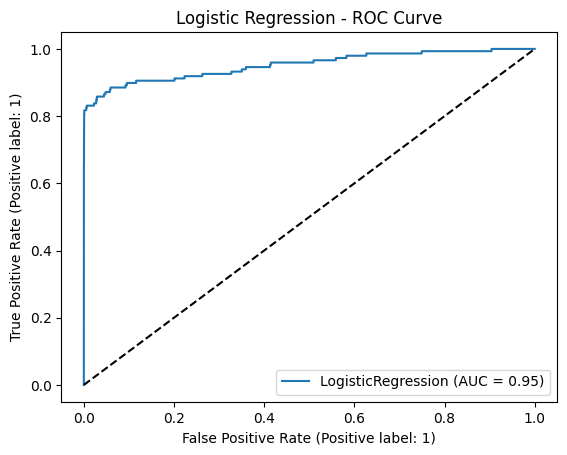

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay

# Baseline Logistic Regression Model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_proba_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix and Classification Report
print("Logistic Regression - Confusion Matrix")
print(confusion_matrix(y_test, y_pred_logistic))
print("\nLogistic Regression - Classification Report")
print(classification_report(y_test, y_pred_logistic))

# ROC Curve
RocCurveDisplay.from_estimator(logistic_model, X_test_scaled, y_test)
plt.title('Logistic Regression - ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()


### Random Forest

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest - Confusion Matrix
[[85286     9]
 [   43   105]]

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.71      0.80       148

    accuracy                           1.00     85443
   macro avg       0.96      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443



/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


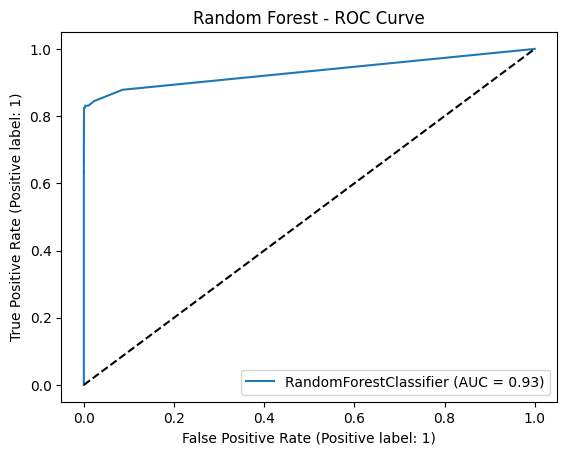

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Baseline Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix and Classification Report
print("Random Forest - Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))

# ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test_scaled, y_test)
plt.title('Random Forest - ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()


**Random Forest**: The Random Forest model shows higher **Precision** (0.92 vs. 0.86) and **Recall** (0.71 vs. 0.62) for the positive class, resulting in a better **F1 Score** (0.80) compared to Logistic Regression (0.72). This suggests that the Random Forest model performs better in identifying the minority class (violent events) more accurately.

**AUC-ROC**: While both models have high **AUC** values, Logistic Regression has a slightly higher **AUC** (0.95 vs. 0.93), indicating strong overall discrimination ability. However, this difference is minimal and does not outweigh the better **Recall** and **F1 Score** achieved by the Random Forest.


# 5. Improving Performance

### 5.1 Addressing Class Imbalance: Resampling Techniques

To improve performance, we apply a resampling techniques to balance the dataset. Here, SMOTETomek for combined oversampling and undersampling. Both Logistic Regression and Random Forest models will be evaluated using this technique

Logistic Regression with SMOTETomek

Best threshold for Logistic Regression: 1.00
Confusion Matrix - Logistic Regression with SMOTETomek and Threshold Tuning:
[[56851    13]
 [   23    75]]
Classification Report - Logistic Regression with SMOTETomek and Threshold Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.77      0.81        98

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



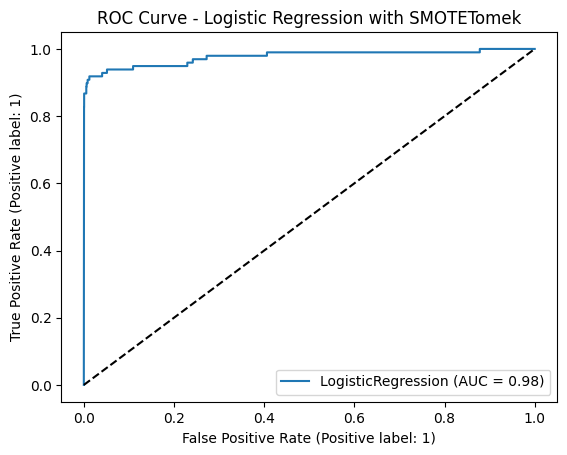

In [81]:
from imblearn.combine import SMOTETomek

# Apply SMOTETomek for resampling the minority class
smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train_scaled, y_train)

### Logistic Regression with SMOTETomek ###

# Train the logistic regression model on SMOTETomek data
logistic_model_smotetomek = LogisticRegression(random_state=42, max_iter=1000)
logistic_model_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)

# Predict probabilities for threshold tuning
y_proba_logistic = logistic_model_smotetomek.predict_proba(X_test_scaled)[:, 1]

# Precision-recall curve for threshold tuning
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_logistic)

# Calculate F1 score at each threshold and choose the best one
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold for Logistic Regression: {best_threshold:.2f}")

# Make predictions based on best threshold
y_pred_logistic_custom_threshold = (y_proba_logistic >= best_threshold).astype(int)

# Print confusion matrix and classification report
print("Confusion Matrix - Logistic Regression with SMOTETomek and Threshold Tuning:")
print(confusion_matrix(y_test, y_pred_logistic_custom_threshold))
print("Classification Report - Logistic Regression with SMOTETomek and Threshold Tuning:")
print(classification_report(y_test, y_pred_logistic_custom_threshold))

# Plot ROC Curve
RocCurveDisplay.from_estimator(logistic_model_smotetomek, X_test_scaled, y_test)
plt.title('ROC Curve - Logistic Regression with SMOTETomek')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

 Random Forest with SMOTETomek

Confusion Matrix - Random Forest with SMOTETomek:
[[85270    25]
 [   31   117]]
Classification Report - Random Forest with SMOTETomek:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.79      0.81       148

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



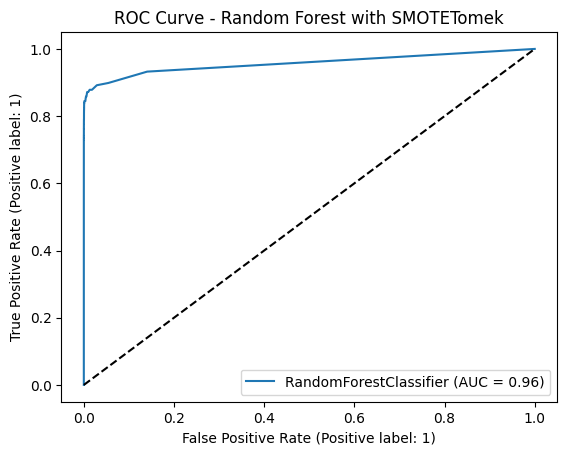

In [73]:
### Random Forest with SMOTETomek ###

# Train a Random Forest model on SMOTETomek data
rf_model_smotetomek = RandomForestClassifier(random_state=42)
rf_model_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)

# Make predictions
y_pred_rf = rf_model_smotetomek.predict(X_test_scaled)

# Print confusion matrix and classification report for Random Forest
print("Confusion Matrix - Random Forest with SMOTETomek:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report - Random Forest with SMOTETomek:")
print(classification_report(y_test, y_pred_rf))

# Plot ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf_model_smotetomek, X_test_scaled, y_test)
plt.title('ROC Curve - Random Forest with SMOTETomek')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

After SMOTETomek resampling, Logistic Regression improved recall from 0.62 to 0.77 and F1 Score from 0.72 to 0.81, with AUC-ROC at 0.95 to 0.98. Random Forest saw recall rise from 0.71 to 0.79, F1 Score from 0.80 to 0.81, and AUC-ROC from 0.93 to 0.96.

### 5.2  Balancing at the Algorithm Level

Adjusting the class weights within the models helps address class imbalance by giving more importance to the minority class.



Logistic Regression

Best threshold for Logistic Regression: 1.00
Confusion Matrix - Logistic Regression with Class Weight and Threshold Tuning:
[[56853    11]
 [   25    73]]
Classification Report - Logistic Regression with Class Weight and Threshold Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.74      0.80        98

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



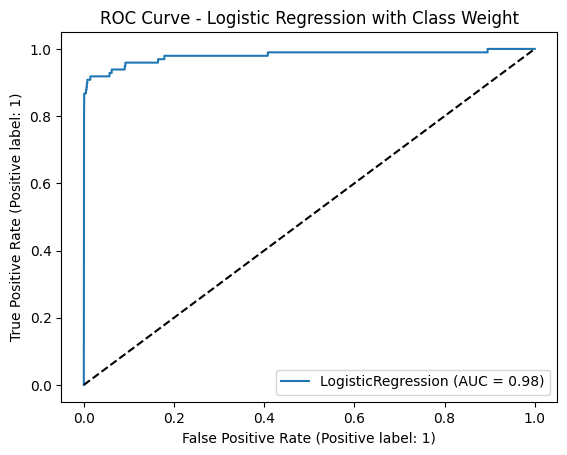

In [79]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is already loaded in X and y
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression with Class Weight Adjustment ###

# Train the logistic regression model with class_weight='balanced'
logistic_model_weighted = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logistic_model_weighted.fit(X_train_scaled, y_train)

# Predict probabilities for threshold tuning
y_proba_logistic = logistic_model_weighted.predict_proba(X_test_scaled)[:, 1]

# Precision-recall curve for threshold tuning
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_logistic)

# Calculate F1 score at each threshold and choose the best one
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold for Logistic Regression: {best_threshold:.2f}")

# Make predictions based on the best threshold
y_pred_logistic_custom_threshold = (y_proba_logistic >= best_threshold).astype(int)

# Print confusion matrix and classification report
print("Confusion Matrix - Logistic Regression with Class Weight and Threshold Tuning:")
print(confusion_matrix(y_test, y_pred_logistic_custom_threshold))
print("Classification Report - Logistic Regression with Class Weight and Threshold Tuning:")
print(classification_report(y_test, y_pred_logistic_custom_threshold))

# Plot ROC Curve for Logistic Regression
RocCurveDisplay.from_estimator(logistic_model_weighted, X_test_scaled, y_test)
plt.title('ROC Curve - Logistic Regression with Class Weight')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()


Random Forest

Confusion Matrix - Random Forest with Class Weight:
[[56862     2]
 [   24    74]]
Classification Report - Random Forest with Class Weight:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



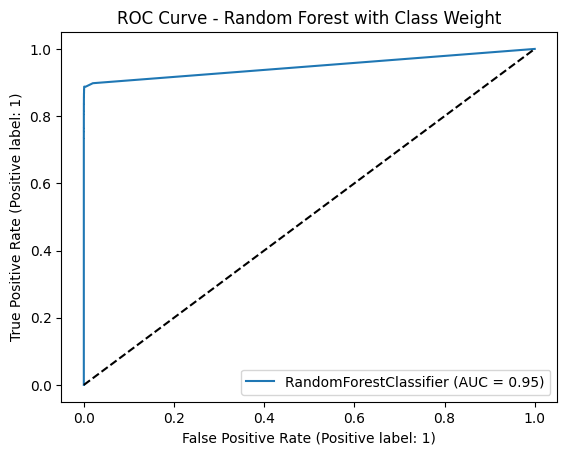

In [80]:
### Random Forest with Class Weight Adjustment ###

# Train the Random Forest model with class_weight='balanced'
rf_model_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_weighted.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model_weighted.predict(X_test_scaled)

# Print confusion matrix and classification report for Random Forest
print("Confusion Matrix - Random Forest with Class Weight:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report - Random Forest with Class Weight:")
print(classification_report(y_test, y_pred_rf))

# Plot ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf_model_weighted, X_test_scaled, y_test)
plt.title('ROC Curve - Random Forest with Class Weight')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()



With class weight balancing, Logistic Regression further improved recall to 0.74 and F1 Score to 0.80, while AUC-ROC to 0.98. Random Forest achieved recall of 0.76, F1 Score of 0.85, and  AUC-ROC to 0.95

# Task 3: Performance Improvement
To improve the model's performance, especially for the minority class, I applied two main techniques:

SMOTETomek Resampling:

I used SMOTETomek, which combines SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic minority samples and Tomek links to remove overlapping majority samples. This creates a more balanced dataset, enabling the model to learn better from minority class examples.

Class Weight Balancing:

In addition to resampling, I set the class_weight='balanced' parameter at the algorithm level for both Logistic Regression and Random Forest. This further emphasizes the minority class by adjusting the weight during training, helping the model focus on correctly identifying positive instances.

# 6. Conclusion 

The machine learning analysis on the violence.csv dataset focused on predicting violent escalations. Random Forest outperformed Logistic Regression, especially in recall and F1 score, making it better suited for the imbalanced dataset. Using resampling (SMOTETomek) and class weight balancing significantly improved model performance by enhancing minority class detection. Precision, recall, F1 score, and AUC-ROC provided a balanced evaluation.